In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df_xlk = pd.read_csv("XLK.csv")
GSPC = pd.read_csv("GSPC.csv")

In [13]:
df_xlk

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,55.625000,55.625000,53.500000,55.437500,42.116329,938100
1,2000-01-04,54.000000,54.750000,52.312500,52.625000,39.979668,545500
2,2000-01-05,51.750000,53.062500,50.125000,51.843750,39.386139,1906000
3,2000-01-06,51.250000,52.093750,49.625000,50.125000,38.080383,1670000
4,2000-01-07,49.625000,51.000000,49.125000,51.000000,38.745129,686000
...,...,...,...,...,...,...,...
5839,2023-03-20,142.889999,143.710007,141.820007,143.529999,143.529999,5990800
5840,2023-03-21,144.309998,144.949997,142.809998,144.690002,144.690002,6533200
5841,2023-03-22,144.690002,147.570007,143.169998,143.250000,143.250000,7112200
5842,2023-03-23,145.080002,147.550003,144.210007,145.580002,145.580002,8797900


In [16]:
df_xlk["daily_retun"] = df_xlk['Adj Close'].pct_change()

In [17]:
df_xlk

,Date,Open,High,Low,Close,Adj Close,Volume,daily_retun
0,2000-01-03,55.625000,55.625000,53.500000,55.437500,42.116329,938100,NaN
1,2000-01-04,54.000000,54.750000,52.312500,52.625000,39.979668,545500,-0.050732
2,2000-01-05,51.750000,53.062500,50.125000,51.843750,39.386139,1906000,-0.014846
3,2000-01-06,51.250000,52.093750,49.625000,50.125000,38.080383,1670000,-0.033153
4,2000-01-07,49.625000,51.000000,49.125000,51.000000,38.745129,686000,0.017456
...,...,...,...,...,...,...,...,...
5839,2023-03-20,142.889999,143.710007,141.820007,143.529999,143.529999,5990800,0.002696
5840,2023-03-21,144.309998,144.949997,142.809998,144.690002,144.690002,6533200,0.008082
5841,2023-03-22,144.690002,147.570007,143.169998,143.250000,143.250000,7112200,-0.009952
5842,2023-03-23,145.080002,147.550003,144.210007,145.580002,145.580002,8797900,0.016265


In [20]:
# Generado por la aplicación del calculo financiero
df_xlk.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
daily_retun    1
dtype: int64

In [21]:
df_xlk = df_xlk.fillna(0)

In [22]:
# Generado por la aplicación del calculo financiero
df_xlk.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
daily_retun    0
dtype: int64

In [45]:

df_xlk.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_retun
0,2000-01-03,55.625,55.625,53.5000,55.4375,42.116329,938100,0.000000
1,2000-01-04,54.000,54.750,52.3125,52.6250,39.979668,545500,-0.050732


In [ ]:
GSPC = pd.read_csv("GSPC.csv")

In [55]:
GSPC["daily_retun"] = GSPC['Adj Close'].pct_change()
GSPC = GSPC.fillna(0)

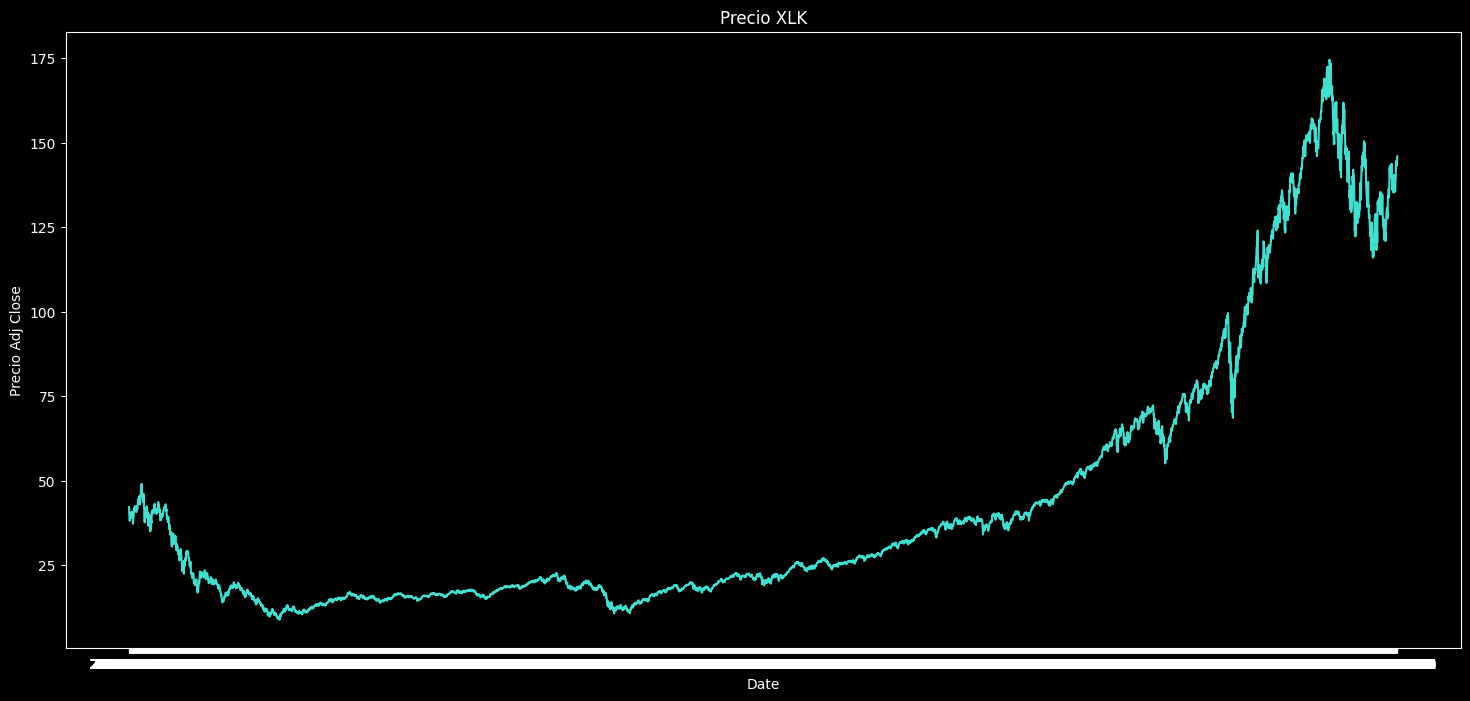

In [48]:
# Configuración de estilo
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'

# Agregamos título y etiquetas a los ejes
plt.figure(figsize=(18,8))
plt.title('Precio XLK')
plt.xlabel('Date')
plt.ylabel('Precio Adj Close')

# Trazar el gráfico
plt.plot(df_xlk['Date'],df_xlk["Adj Close"],  color = "turquoise")
plt.show()

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

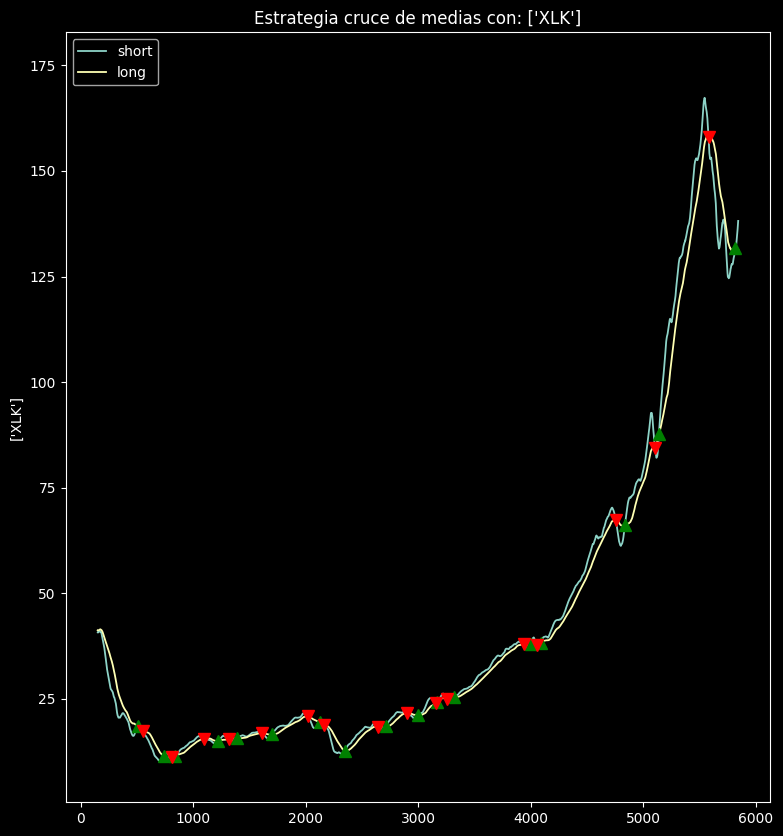

In [65]:
assets = ['XLK']

short_window = 50
long_window = 150

data = df_xlk["Adj Close"]
signal = pd.DataFrame(index=data.index)
signal['short'] = data.rolling(short_window).mean()
signal['long'] = data.rolling(long_window).mean()

signal['short'] = signal['short'].iloc[long_window:]
signal['signals'] = np.where(signal['short'] > signal['long'], 1, 0)
signal['positions'] = signal['signals'].diff()

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, ylabel=assets)
ax1.set_title("Estrategia cruce de medias con: " + str(assets))

data.iloc[long_window:].plot(ax=ax1, color='k', lw=1.9)

signal[['short', 'long']].plot(ax=ax1, lw=1.3)
ax1.plot(signal['short'][signal['positions'] == 1], '^', markersize=8, color='g')
ax1.plot(signal['short'][signal['positions'] == -1], 'v', markersize=8, color='r')

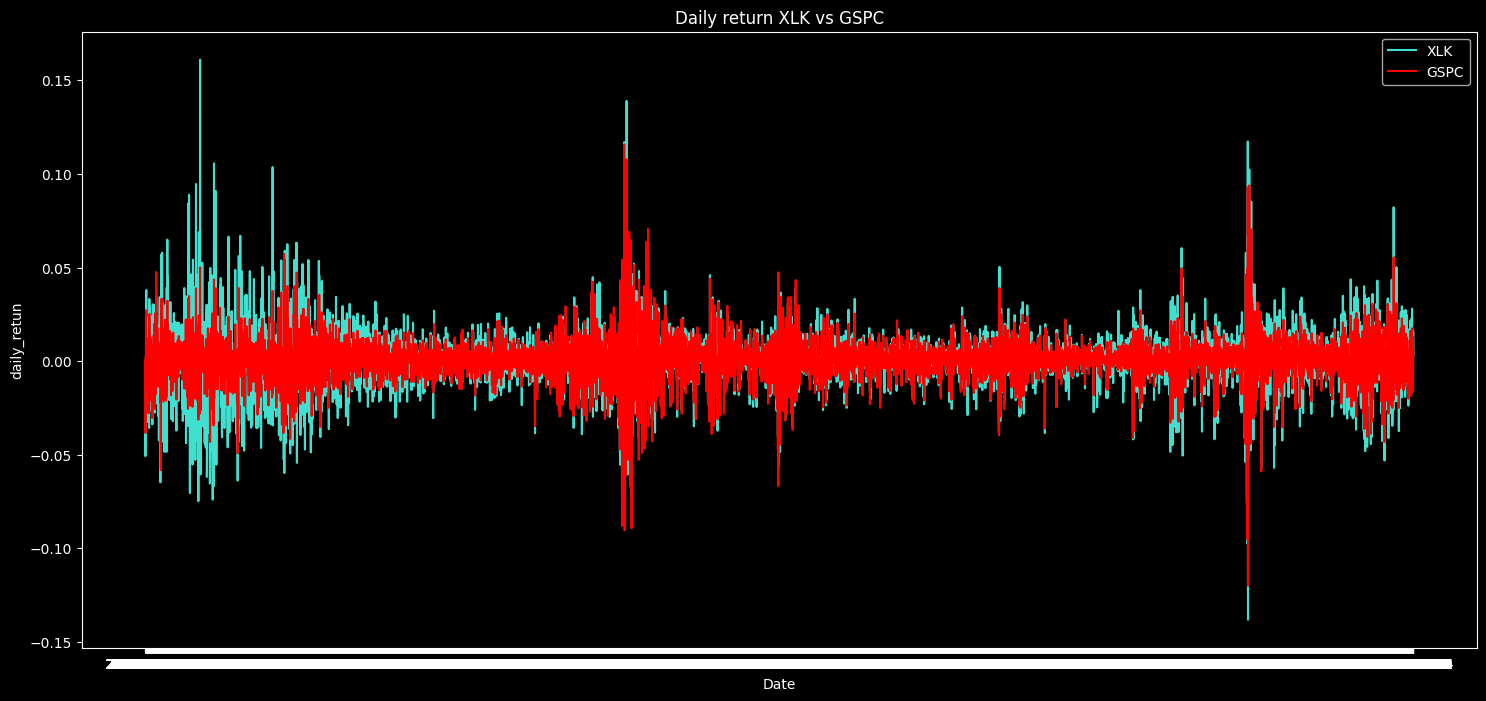

In [63]:
# Configuración de estilo
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'

# Agregamos título y etiquetas a los ejes
plt.figure(figsize=(18,8))
plt.title('Daily return XLK vs GSPC')
plt.xlabel('Date')
plt.ylabel('daily_retun')

# Trazar el gráfico
plt.plot(df_xlk['Date'],df_xlk["daily_retun"],label='XLK',  color = "turquoise")
plt.plot(GSPC['Date'],GSPC["daily_retun"],label='GSPC',  color = "red")
plt.legend()
plt.show()